In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabet = pd.read_csv("pima-indians-diabetes.csv", skiprows = 9, header=None)
diabet.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
diabet.columns = ["Number of times pregnant", "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
                  "Diastolic blood pressure (mm Hg)", "Triceps skin fold thickness (mm)",
                  "2-Hour serum insulin (mu U/ml)", "Body mass index (weight in kg/(height in m)^2)",
                  "Diabetes pedigree function", "Age (years)", "Class variable (0 or 1)"]

diabet.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
y=diabet['Class variable (0 or 1)']
x=diabet.drop(['Class variable (0 or 1)'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=14)
x_train.shape,y_train.shape

((576, 8), (576,))

In [67]:
x_test.shape,y_test.shape

((192, 8), (192,))

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=14)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=14)

In [69]:
dt_model.score(x_train,y_train)

1.0

In [46]:
dt_model.score(x_test,y_test)

0.7135416666666666

In [47]:
from sklearn.metrics import confusion_matrix
tree_pred=dt_model.predict(x_test)
confusion_matrix(y_test, tree_pred)
tree_pred1 = dt_model.predict(x_train)

In [48]:
confusion_matrix(y_train, tree_pred1)

array([[382,   0],
       [  0, 193]], dtype=int64)

In [49]:
train_accuracy = []
test_accuracy = []
for depth in range(1,7):
    dt_model=DecisionTreeClassifier(max_depth=depth, random_state=14)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))
frame = pd.DataFrame({'max_depth':range(1,7),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame


,max_depth,train_acc,test_acc
0,1,0.756522,0.729167
1,2,0.756522,0.729167
2,3,0.773913,0.729167
3,4,0.801739,0.739583
4,5,0.841739,0.755208
5,6,0.871304,0.682292


In [50]:
dt_model=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=10,random_state=5)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, random_state=5)

In [51]:
dt_model.score(x_train,y_train)

0.7878260869565218

In [52]:
dt_model.score(x_test,y_test)

0.7447916666666666

In [53]:
!pip install graphviz

[Text(443.11764705882354, 489.24, 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test <= 143.5\ngini = 0.446\nsamples = 575\nvalue = [382, 193]'),
 Text(246.1764705882353, 380.52000000000004, 'Age (years) <= 30.5\ngini = 0.351\nsamples = 444\nvalue = [343, 101]'),
 Text(147.70588235294116, 271.8, 'Body mass index (weight in kg/(height in m)^2) <= 45.4\ngini = 0.227\nsamples = 268\nvalue = [233, 35]'),
 Text(98.47058823529412, 163.08000000000004, 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test <= 123.5\ngini = 0.208\nsamples = 263\nvalue = [232, 31]'),
 Text(49.23529411764706, 54.360000000000014, 'gini = 0.133\nsamples = 210\nvalue = [195, 15]'),
 Text(147.70588235294116, 54.360000000000014, 'gini = 0.422\nsamples = 53\nvalue = [37, 16]'),
 Text(196.94117647058823, 163.08000000000004, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(344.6470588235294, 271.8, 'Body mass index (weight in kg/(height in m)^2) <= 26.95\ngini = 0.469\nsamples 

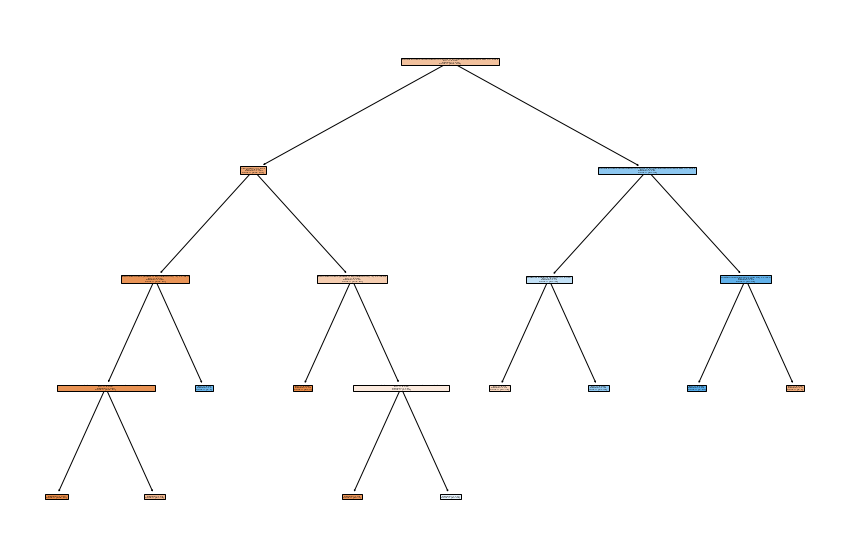

In [54]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True,feature_names=x_train.columns)